# Elevasi Survace Model
Bagus Ardin Saputra - 120140176

### A. Tujuan
Mahasiswa diharapkan memahami dan mampu mengimplementasikan pemodelan permukaan menggunakan data elevasi melalui pendekatan grid data model dan triangulated irregular network (TIN)

### B. Pertanyaan Teori
1. Apa yang dimaksud dengan grid data model dan TIN dalam pemodelan permukaan?
2. Bagaimana cara kerja algoritma interpolasi dalam grid data model dan algoritma Delaunay triangulation untuk TIN?
3. Apa perbedaan utama antara grid data model dan TIN dalam representasi permukaan?
#### Jawaban
1. Grid data model adalah model permukaan yang dibentuk dari data elevasi yang dikelompokkan dalam bentuk grid. Sedangkan TIN adalah model permukaan yang dibentuk dari data elevasi yang dikelompokkan dalam bentuk segitiga.
2. Algoritma interpolasi dalam grid data model bekerja dengan cara mengisi nilai elevasi pada setiap titik grid berdasarkan nilai elevasi titik-titik data yang diketahui. Sedangkan algoritma Delaunay triangulation untuk TIN bekerja dengan cara menghubungkan titik-titik data yang diketahui dengan segitiga-segitiga yang tidak tumpang tindih.
3. Perbedaan utama antara grid data model dan TIN dalam representasi permukaan adalah grid data model menggunakan grid sebagai representasi permukaan, sedangkan TIN menggunakan segitiga sebagai representasi permukaan.

### C. Praktikum

In [43]:
import os
import rasterio
import matplotlib.pyplot as plt

In [44]:
path = os.path.join(os.getcwd(), 'output', 'dem.tif') 

In [45]:
if not os.path.exists(path):
    print('Please run pre_processing_data.ipynb first to get the merged.tif file')
else:
    print('Datset is ready to be used')

Datset is ready to be used


In [46]:
# Buka file GeoTiff
with rasterio.open(path) as src:
    data = src.read(1)  # Membaca band pertama
    profile = src.profile

In [47]:
print(data.shape)

(580, 1134)


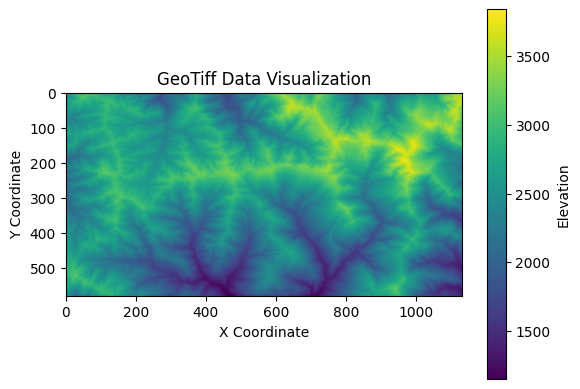

In [48]:
# Visualisasi data asli
plt.imshow(data, cmap='viridis')
plt.colorbar(label='Elevation')
plt.title('GeoTiff Data Visualization')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()

In [49]:
import rasterio
import numpy as np
from scipy.spatial import Delaunay
from scipy.interpolate import griddata

In [50]:
# Buka file GeoTiff
with rasterio.open(path) as src:
    data = src.read(1)  # Membaca band pertama
    profile = src.profile # Mendapatkan profile

    # Mendapatkan koordinat (preprocessing data)
    transform = src.transform 
    rows, cols = np.meshgrid(np.arange(data.shape[1]), np.arange(data.shape[0]))
    x, y = rasterio.transform.xy(transform, rows, cols)

In [51]:
# Flatten arrays
x = np.array(x).flatten()
y = np.array(y).flatten()
z = data.flatten()

In [52]:
xmin = np.min(x)
xmax = np.max(x)
ymin = np.min(y)
ymax = np.max(y)

In [53]:
points = np.c_[x, y]

In [54]:
tri = Delaunay(points) # membuat triangulasi

In [55]:
grid_x, grid_y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
grid_z = griddata((x, y), z, (grid_x, grid_y), method='cubic') # interpolasi data

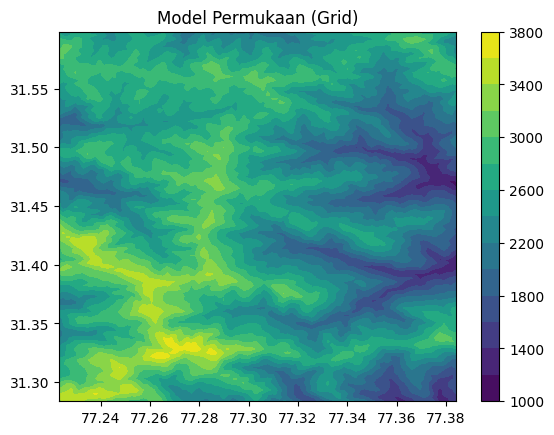

In [56]:
plt.contourf(grid_x, grid_y, grid_z, levels=15)
plt.colorbar()
plt.title('Model Permukaan (Grid)')
plt.show()

Hasil visualisasi dengan pemodelan grid terkesan halus dan tidak terlalu tajam pada setiap permukaan atau contour. Terdapat berbagai gradasi warna yang memperkaya informasi dari setiap elevasi. Namun gradasi ini menjadi salah satu kelemahan dari teknik grid, karena data yang dihasilkan tidak terlalu terlihat.

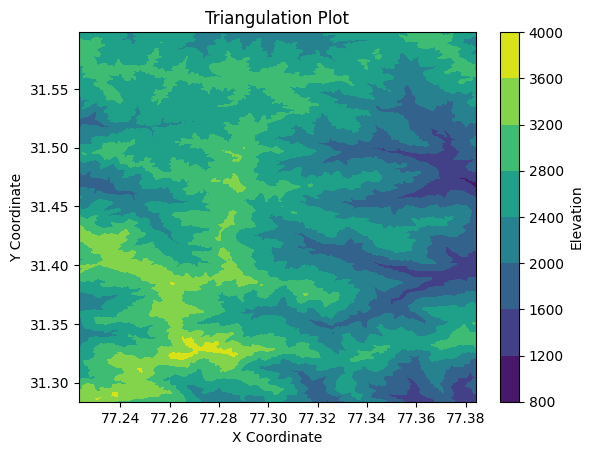

In [57]:
plt.triplot(x, y, tri.simplices)
plt.tricontourf(x, y, tri.simplices, z, cmap='viridis')
plt.colorbar(label='Elevation')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Triangulation Plot')
plt.show()

Hasil visualisasi dengan pemodelan TIN terkesan lebih tajam dan jelas pada setiap permukaan atau contour. Namun, terdapat beberapa bagian yang tidak terlalu rapih dan terlihat kurang halus. Namun, teknik ini lebih mudah dalam mengidentifikasi elevasi tertinggi dan terendah.

Dalam pemodelan permukaan, baik grid data model maupun TIN memiliki kelebihan dan kekurangan masing-masing. Pemilihan teknik pemodelan yang tepat tergantung pada kebutuhan dan tujuan analisis yang ingin dicapai. Adapun secara performa, TIN lebih unggul dalam hal kecepatan dan efisiensi dalam pengolahan data, sedangkan grid data model lebih unggul dalam hal visualisasi dan representasi data yang lebih baik. 